In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import itertools

In [2]:
simplify_dir = '/Volumes/Data2/RST/notebook/GTFS/TTC_2016-10-03/GIS Simplify/'
gtfs_dir = '/Volumes/Data2/RST/notebook/GTFS/TTC_2016-10-03/'

In [3]:
# simplify_dir = 'D:/RST/RST/notebook/GTFS/TTC_2016-10-03/GIS Simplify/'

# gtfs_dir = 'D:/RST/notebook/GTFS/TTC_2016-10-03/'

In [4]:
ward_int = pd.read_csv('/Volumes/Data2/RST/notebook/GIS/int_wards.csv')

#ward_int = pd.read_csv('D:/RST/notebook/GIS/int_wards.csv')

ward_int['INT_ID_STR'] = ward_int['INT_ID'].astype(str)

In [5]:
period = 'EV'
period_hr = 20

In [6]:
# G = nx.read_gexf('D:/RST/notebook/networks/' + period +'-RM-16-singleDi.gexf')
# graph_data = pd.read_csv('D:/RST/notebook/networks/' + period +'-RM-16-singleDi.csv')


G = nx.read_gexf('/Volumes/Data2/RST/notebook/networks/' + period +'-RM-16-singleDi.gexf')
graph_data = pd.read_csv('/Volumes/Data2/RST/notebook/networks/' + period +'-RM-16-singleDi.csv')



stop_times_od = pd.read_csv(gtfs_dir + 'stop_times_full.csv')

In [7]:
route_dir = stop_times_od[stop_times_od['hr_o'] == period_hr]
route_dir = route_dir[['INT_ID_o', 'INT_ID_d', 'route_short_name']].drop_duplicates()
route_dir = route_dir.groupby(['INT_ID_o', 'INT_ID_d'])['route_short_name'].apply(list).reset_index()
route_dir = route_dir.merge(graph_data)

In [32]:
result_list = []
ward_n = []

ward = 10



G_ward = G.copy()


G_ward.remove_nodes_from(list(ward_int[ward_int['AREA_SHORT_CODE'] != ward]['INT_ID_STR']))

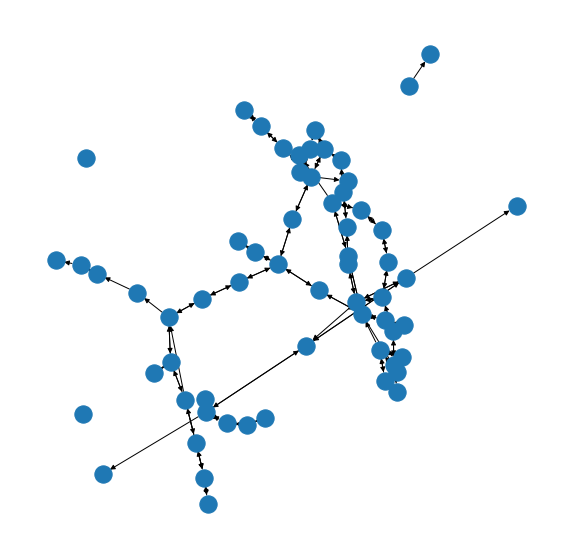

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 10))

nx.draw(G_ward, ax = ax)

In [34]:
G_ward.nodes

NodeView(('100', '151', '152', '13466618', '13466708', '13466802', '13466977', '13466982', '13466991', '13467067', '13467197', '13467252', '13467311', '13467321', '13467337', '13467412', '13467437', '13467485', '13467505', '13467593', '13467650', '13467654', '13467665', '13467695', '13467715', '13467722', '13467752', '13467763', '13467795', '13467854', '13467856', '13467859', '13467909', '13467923', '13467969', '13467971', '13468053', '13468120', '13468134', '13468309', '13468313', '13468316', '13468377', '13468440', '13468584', '13468652', '13468663', '13468727', '13468803', '14063912', '14134889', '14254033', '14255084', '14255097', '20054558', '20056886', '20111568', '20145410', '20147074', '30109241', '1', '2'))

In [16]:
remove_nodes = list(ward_int[ward_int['AREA_SHORT_CODE'] != ward]['INT_ID'])

graph_ward = graph_data[~graph_data['INT_ID_o'].isin(remove_nodes)]
graph_ward = graph_ward[~graph_ward['INT_ID_d'].isin(remove_nodes)]
graph_ward

,INT_ID_o,INT_ID_d,freq,scaled_freq,link
150,200,201,16,0.2000,200-201
151,200,13467982,2,0.0250,200-13467982
152,200,13468572,14,0.1750,200-13468572
153,200,13468683,13,0.1625,200-13468683
154,200,13468822,6,0.0750,200-13468822
...,...,...,...,...,...
7381,30070002,13469683,3,0.0375,30070002-13469683
7382,30070005,13469442,3,0.0375,30070005-13469442
7383,30070005,13469683,6,0.0750,30070005-13469683
7384,30070005,20031732,6,0.0750,30070005-20031732
